# Introduction to Machine Learning with Python

## 1. What is Machine Learning?

- Definition: Machine learning (ML) is a branch of artificial intelligence that involves training algorithms to make predictions or decisions based on data, without being explicitly programmed.
- Applications:
    - Finance: Stock price prediction, fraud detection, risk analysis, customer segmentation, etc.
    - Other fields: Image recognition, natural language processing, recommendation systems.
    
    
**Library**: `scikit-learn`: A powerful library for machine learning that provides tools for preprocessing data, training models, and evaluating them. Workflow

- Importing the model class
- Instantiating a model object
- Fitting the model object to some data
- Predicting the outcome given the fitted model for some data


### Types of Machine Learning

- Supervised Learning: The model learns from labeled data (i.e., input-output pairs). Examples: Regression and classification tasks.
- Unsupervised Learning: The model learns from unlabeled data to find hidden patterns or groupings. Example: Clustering.
- Reinforcement Learning: The model learns through interactions with an environment and feedback from its actions.

#### Supervised Learning

- Regression: Predicting a continuous value (e.g., stock prices, real estate values).
- Classification: Predicting a categorical label (e.g., credit approval, fraud detection).

#### Unsupervised Learning

- Clustering: Grouping data points based on similarities (e.g., customer segmentation).
- Dimensionality Reduction: Reducing the number of features while preserving the most important information (e.g., PCA).

## 2. Unsupervised Learning

Unsupervised learning embodies the idea that a machine learning algorithm discovers insights from raw data without any further guidance. One such algorithm is the k- means clustering algorithm that clusters a raw data set into a number of subsets and assigns these subsets labels (“cluster 0,” “cluster 1,” etc.). Another one is Gaussian mixture.

### 2.1 Data

`scikit-learn` allows the creation of sample data sets for differ‐ ent types of ML problems. The following creates a sample data set suited to illustrat‐ ing k-means clustering.

In [2]:
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [4]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)

In [8]:
from sklearn.datasets import make_blobs

In [9]:
X, y = make_blobs(n_samples=250, centers=4,
                              random_state=500, cluster_std=1.25)

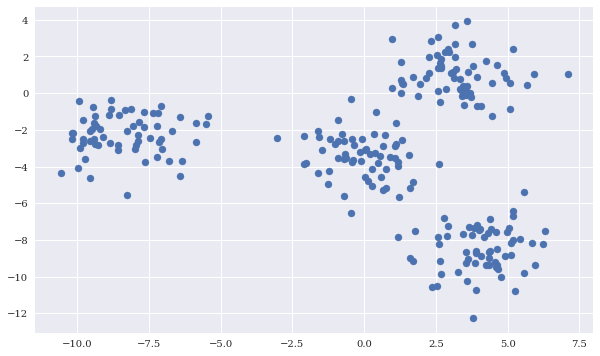

In [11]:
plt.figure(figsize = (10,6));
plt.scatter(X[:,0], X[:,1], s = 50);

### 2.2. K-means clustering

Background information on K-means clustering techniques [here](http://localhost:8888/notebooks/Extra%20-%20K-means%20clustering.ipynb)

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans (n_clusters = 4, random_state = 0)

In [14]:
model.fit(X)

KMeans(n_clusters=4, random_state=0)

In [15]:
y_kmeans = model.predict(X)

In [16]:
y_kmeans[:12]

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2], dtype=int32)

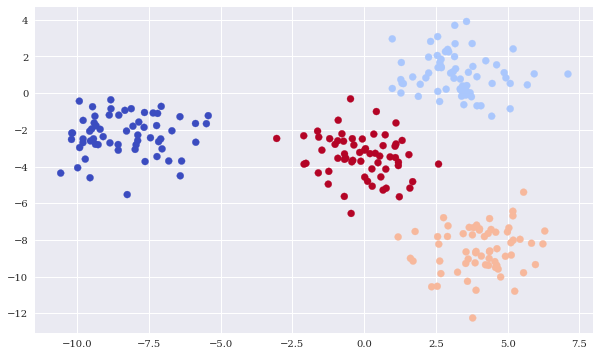

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm');

## 3. Supervised Learning

Supervised learning is machine learning with some guidance in the form of known results or observed data. This means that the raw data already contains what the ML algorithm is supposed to learn.

The examples in the previous subsection showed that with unsupervised learning the algorithms come up with their own categorical labels for the clusters identified. With four clusters, the labels are 0, 1, 2, and 3. In supervised learning, such categorical labels are already given, so that the algorithm can learn the relationship between the features and the categories (classes). In other words, during the fitting step, the algo‐ rithm knows the right class for the given feature value combinations.

### 3.1 The data

In [19]:
from sklearn.datasets import make_classification

In [20]:
n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2,
                                         n_informative=2, n_redundant=0,
                                         n_repeated=0, random_state=250)

In [22]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [23]:
X.shape

(100, 2)

In [24]:
y[:5]

array([1, 0, 0, 1, 1])

In [25]:
y.shape

(100,)

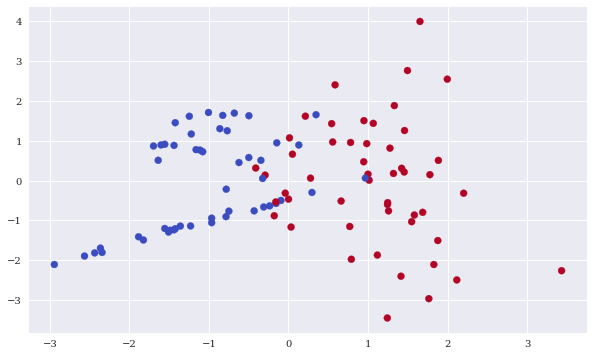

In [28]:
plt.figure(figsize = (10,6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm')

### 3.2 Logistic regression

Background information on Logistic regression techniques [here](http://localhost:8888/notebooks/12.02%20-%20Logistic%20Regression%20.ipynb)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(C = 1, solver = 'lbfgs')

In [31]:
model.fit(X,y)

LogisticRegression(C=1)

In [32]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [34]:
pred = model.predict(X)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score (y,pred)

0.9

In [38]:
Xc = X[y == pred]
Xf = X[y != pred]

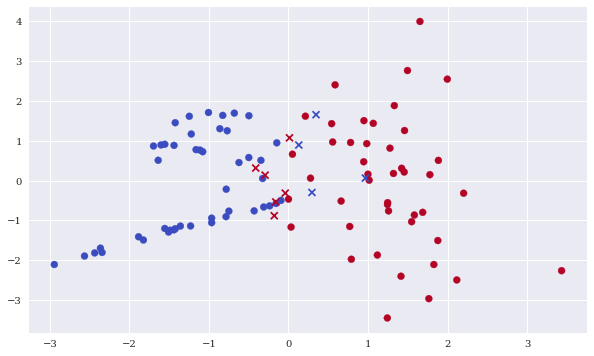

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
                         marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
                         marker='x', cmap='coolwarm');

### 3.3 Decision trees


Background information on Decision Trees techniques [here](http://localhost:8888/notebooks/12.03%20-%20Decision%20trees.ipynb)


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model = DecisionTreeClassifier(max_depth=1)

In [44]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [45]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [46]:
pred = model.predict(X)

In [47]:
accuracy_score(y,pred)

0.92

In [48]:
Xc = X[y == pred]
Xf = X[y != pred]

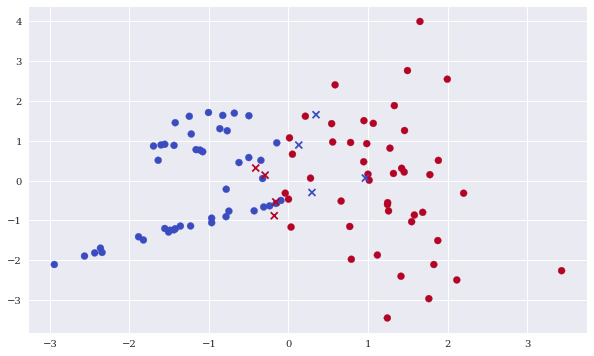

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
                         marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
                         marker='x', cmap='coolwarm');

*Increasing maximum depth*

In [52]:
print('{:>8s} | {:8s}'.format('depth', 'accuracy')) 
print(20 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth) 
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X)) 
    print('{:8d} | {:8.2f}'.format(depth, acc))

   depth | accuracy
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


### Train-test splits

Here’s a complete example using `train_test_split` with the Random Forest classifier and the Iris dataset from `sklearn.datasets`, along with markdown explanations for each step.

---

# Example: Train-Test Split with Random Forest Classifier

## 1. Loading the Iris Dataset

In this example, we’ll use the **Iris dataset**, a classic dataset for classification that contains 150 samples of iris flowers with 4 features: sepal length, sepal width, petal length, and petal width. The target is the species of the iris flower (three classes).

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (class labels)
```

- **`X`**: Represents the feature matrix containing the 4 features for each sample.
- **`y`**: Contains the class labels (0, 1, or 2), which correspond to the different species of iris flowers.

---

## 2. Splitting the Dataset into Training and Test Sets

We will split the dataset into 80% training data and 20% test data using `train_test_split` from `sklearn.model_selection`.

```python
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
```

### Explanation:
- **`test_size=0.2`**: 20% of the data is set aside for testing, and 80% is used for training.
- **`random_state=42`**: Ensures reproducibility; every time the code is run, the split will be the same.
- After splitting, we check the sizes of the training and test sets to confirm that the split was performed correctly.

---

## 3. Training a Random Forest Classifier

We will use a **Random Forest Classifier** from `sklearn.ensemble` to train the model on the training data.

```python
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)
```

### Explanation:
- **`RandomForestClassifier`**: This algorithm creates multiple decision trees and combines their results to improve performance and reduce overfitting.
- **`n_estimators=100`**: The model will use 100 decision trees.
- The model is trained using the **training data** (`X_train`, `y_train`).

---

## 4. Evaluating the Model on the Test Set

After training, we will evaluate the model’s performance on the **test data** (`X_test`, `y_test`).

```python
from sklearn.metrics import accuracy_score

# Predict class labels on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.2f}")
```

### Explanation:
- **`predict(X_test)`**: The model predicts the class labels for the test data.
- **`accuracy_score`**: This function compares the predicted labels (`y_pred`) with the true labels (`y_test`) to compute the accuracy, which is the proportion of correctly classified samples.

---

## 5. Visualizing Feature Importance (Optional)

Random Forests provide a feature importance score, which indicates how useful each feature was in making the predictions.

```python
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances
feature_importances = clf.feature_importances_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()
```

### Explanation:
- **`feature_importances_`**: This attribute provides the importance of each feature in determining the class labels.
- The bar plot shows which features (sepal length, sepal width, etc.) were most important in the model’s decisions.

---

## 6. Full Code Example

```python
# 1. Load Iris Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Predict on Test Set
y_pred = clf.predict(X_test)

# 5. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# 6. Visualize Feature Importance
feature_importances = clf.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()
```

---

## Summary of Steps

1. **Load the dataset**: Use the Iris dataset, which is a standard dataset for classification tasks.
2. **Split the dataset**: Use `train_test_split` to divide the dataset into training and testing sets (80% train, 20% test).
3. **Train the model**: Fit a Random Forest classifier to the training data.
4. **Test the model**: Evaluate the model on the test set using accuracy.
5. **Feature Importance (Optional)**: Visualize which features were most important in the model's predictions.

---



---

### Train-test splits: Support vector machines

Background information on Support Vector Machines [here](http://localhost:8888/notebooks/12.04%20-%20Support%20Vector%20Machines.ipynb)

At this point, every seasoned ML researcher and practitioner reading this probably has concerns with regard to the implementations in this section: they all rely on the same data for training, learning, and prediction. The quality of an ML algorithm can of course be better judged when different data (sub)sets are used for training and learning on the one hand and testing on the other hand. This comes closer to a real- world application scenario.

Again, scikit-learn provides a function to accomplish such an approach efficiently. In particular, the train_test_split() function allows the splitting of data sets into training and test data in a randomized, but nevertheless repeatable, fashion.


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [54]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33,
                                                                 random_state=0)